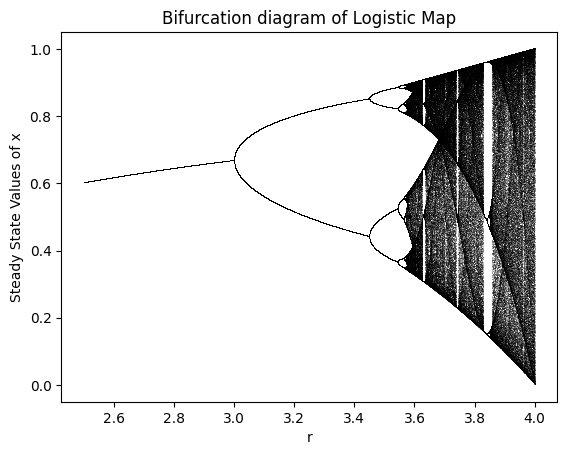

/var/folders/b2/rp63_y3x3l761csvpcgxn18h0000gp/T/ipykernel_1676/2490230098.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axes[i, 0].plot(x, map_func(r, x), 'k', x, x, '--', color='gray')


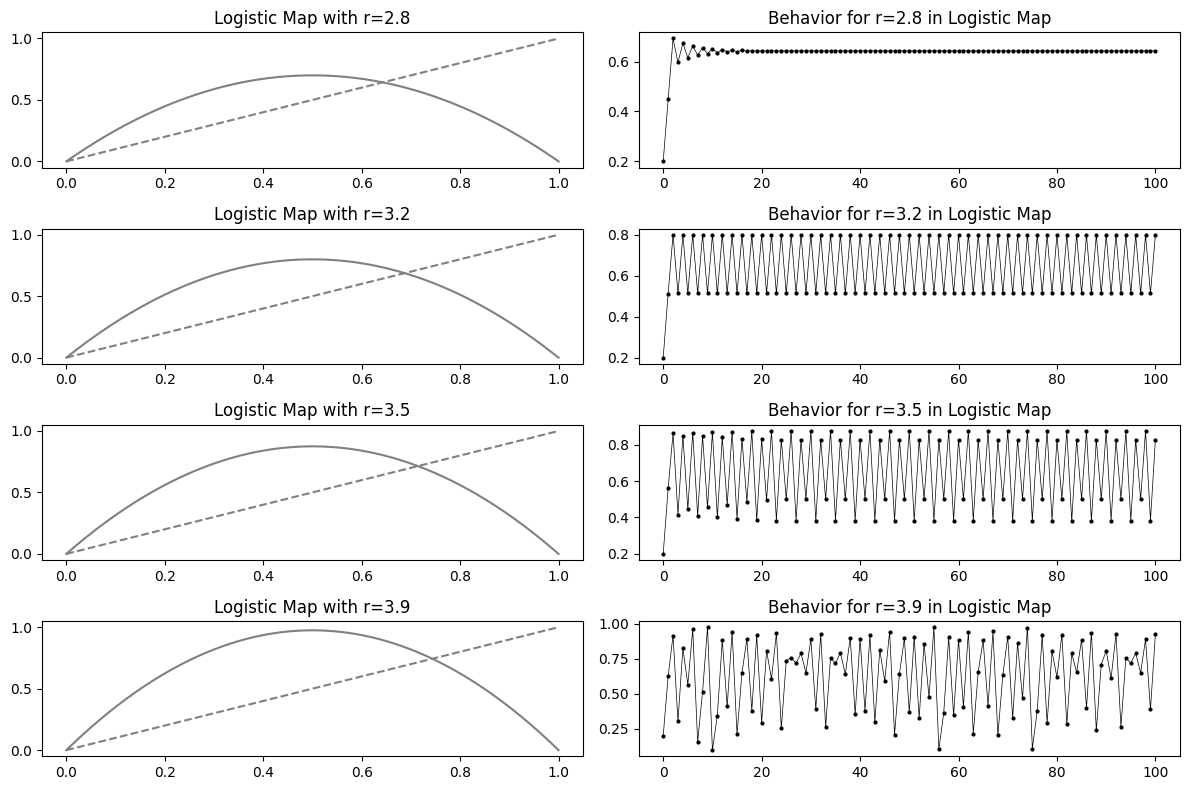

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bifurcation_diagram(map_func, r_values, map_name, iterations=1000, last=100):
    """
    Generate and plot a bifurcation diagram for a given map function.
    """
    x_values = []
    r_plot_values = []
    x = 1e-5  # Initial x value
    for r in r_values:
        for i in range(iterations):
            x = map_func(r, x)
            if i >= (iterations - last):
                x_values.append(x)
                r_plot_values.append(r)
    
    plt.plot(r_plot_values, x_values, ',k', alpha=0.25)
    plt.title(f'Bifurcation diagram of {map_name}')
    plt.xlabel('r')
    plt.ylabel('Steady State Values of x')
    plt.show()

def plot_map_behaviors(map_func, selected_r_values, map_name, iterations=100, initial_x=0.2):
    """
    Plot the behavior of the map for selected values of r, including the line y=x.
    """
    x = np.linspace(0, 1, 400)
    fig, axes = plt.subplots(len(selected_r_values), 2, figsize=(12, len(selected_r_values)*2))
    if len(selected_r_values) == 1:
        axes = np.array([[axes[0]], [axes[1]]])  # Ensure axes are iterable and have correct shape

    for i, r in enumerate(selected_r_values):
        # Plot map function and y=x line
        axes[i, 0].plot(x, map_func(r, x), 'k', x, x, '--', color='gray')
        axes[i, 0].set_title(f'{map_name} with r={r}')
        
        # Simulate and plot map behavior
        x_n = np.empty(iterations + 1)
        x_n[0] = initial_x
        for j in range(1, iterations + 1):
            x_n[j] = map_func(r, x_n[j-1])
        axes[i, 1].plot(x_n, '.-k', markersize=4, linewidth=0.5)
        axes[i, 1].set_title(f'Behavior for r={r} in {map_name}')
    
    plt.tight_layout()
    plt.show()

# Example usage with the logistic map
logistic_map_name = "Logistic Map"
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
generate_bifurcation_diagram(logistic_map, r_values, logistic_map_name)

selected_r_values = [2.8, 3.2, 3.5, 3.9]
plot_map_behaviors(logistic_map, selected_r_values, logistic_map_name)


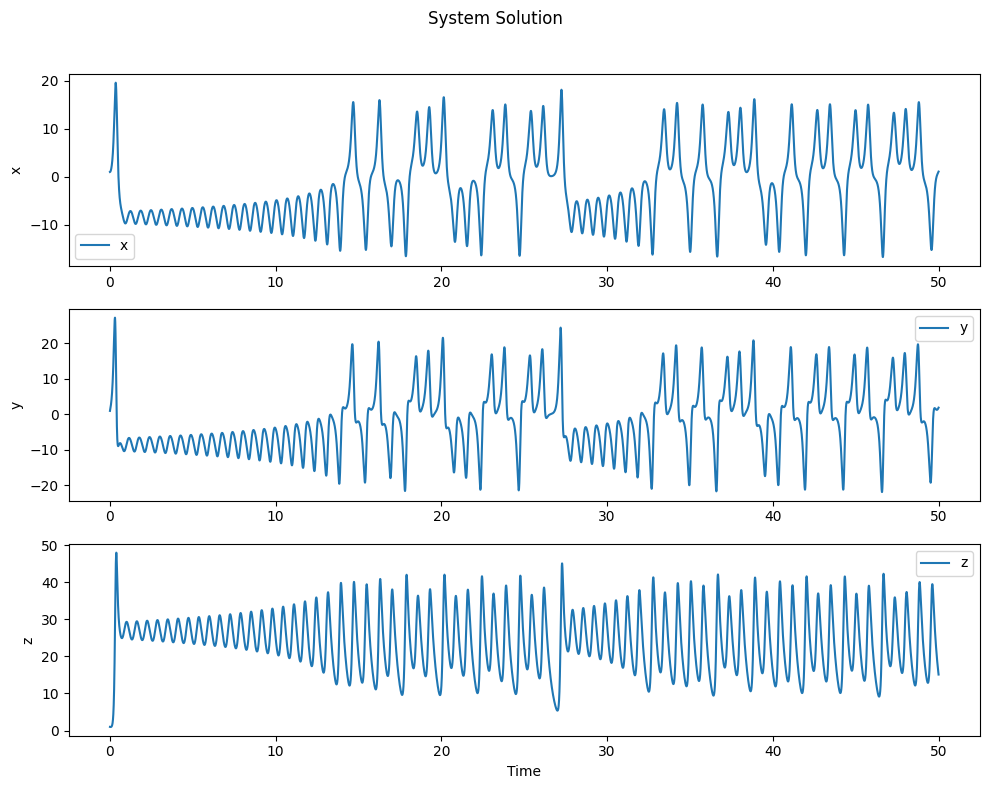

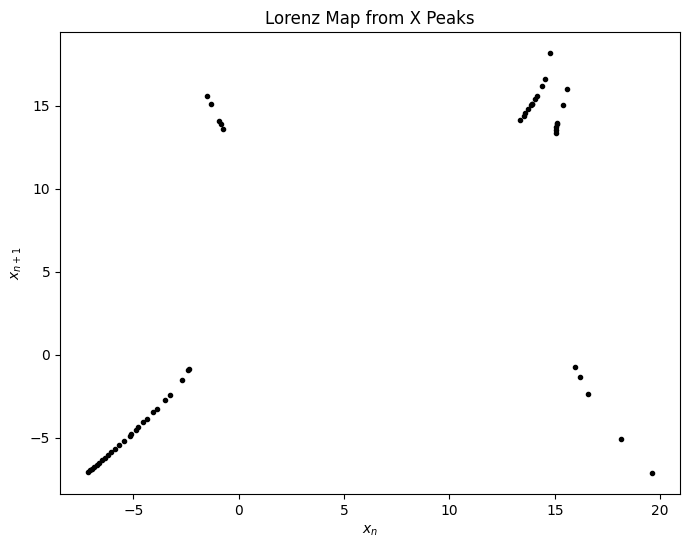

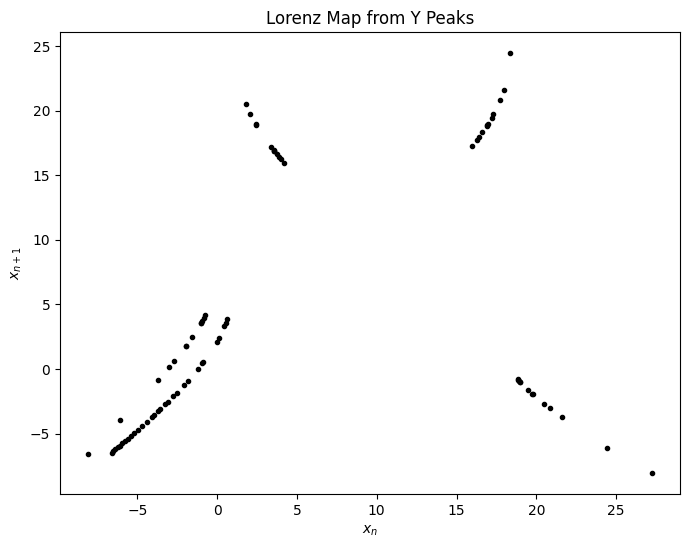

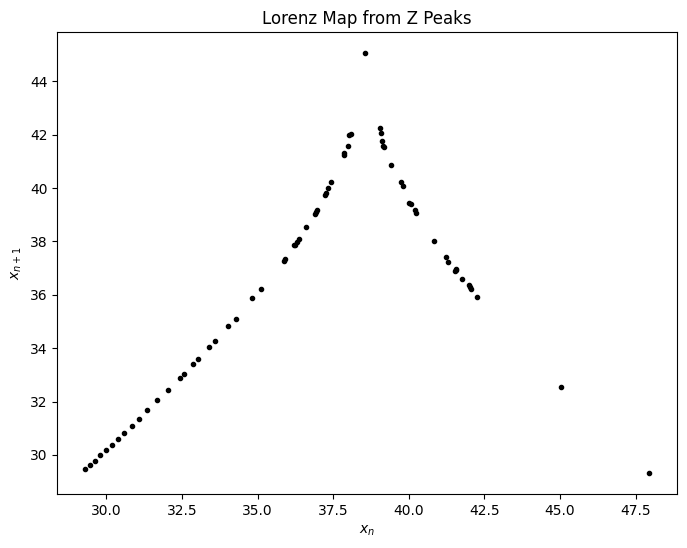

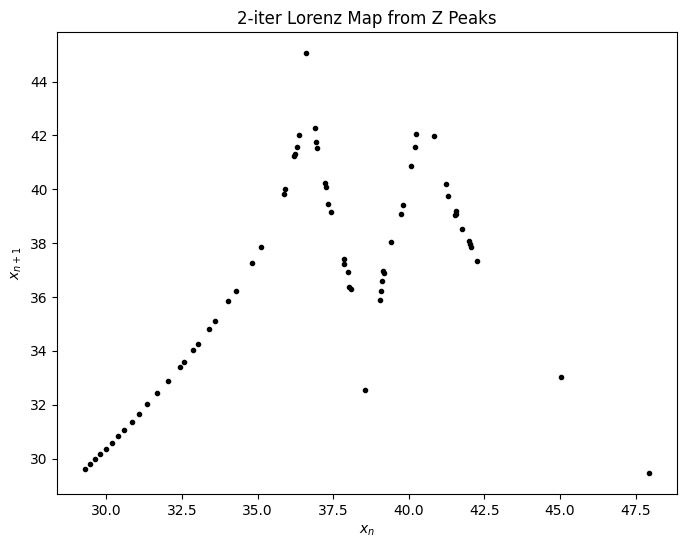

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def lorenz_system(t, state, sigma, b, r):
    """
    Defines the Lorenz system.
    """
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

def solve_system(system_func, initial_state, t_span, params, t_eval):
    """
    Solves a given dynamical system.

    Parameters:
    - system_func: Function defining the system's differential equations.
    - initial_state: Initial state of the system.
    - t_span: Tuple of (start time, end time) for the integration.
    - params: Parameters to pass to the system function.
    - t_eval: Time points at which to solve for the system's state.
    """
    solution = solve_ivp(system_func, t_span, initial_state, args=params, t_eval=t_eval)
    return solution

def plot_solution(t, solution, labels, title='System Solution'):
    """
    Plots the solution of a dynamical system over time.

    Parameters:
    - t: Time points.
    - solution: Solution object returned by solve_ivp.
    - labels: List of labels for the solution's components.
    - title: Title for the plot.
    """
    fig, axs = plt.subplots(len(labels), 1, figsize=(10, 8))
    fig.suptitle(title)  # Set the title for the figure
    for i, label in enumerate(labels):
        axs[i].plot(t, solution.y[i], label=label)
        axs[i].set_ylabel(label)
        if i == len(labels) - 1:
            axs[i].set_xlabel('Time')
        axs[i].legend()
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()

def plot_peaks(solution_component, title='Map from Peaks'):
    """
    Identifies and plots the peaks of a given solution component.

    Parameters:
    - solution_component: A single component of the solution (e.g., z variable).
    - title: Title for the plot.
    """
    peaks_indices, _ = find_peaks(solution_component)
    peaks = solution_component[peaks_indices]
    plt.figure(figsize=(8, 6))
    plt.plot(peaks[:-1], peaks[1:], '.k')
    plt.title(title)
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.show()

def plot_peaks_iter_2(solution_component, title='Map from Peaks'):
    """
    Identifies and plots the peaks of a given solution component.

    Parameters:
    - solution_component: A single component of the solution (e.g., z variable).
    - title: Title for the plot.
    """
    peaks_indices, _ = find_peaks(solution_component)
    peaks = solution_component[peaks_indices]
    plt.figure(figsize=(8, 6))
    plt.plot(peaks[:-2], peaks[2:], '.k')
    plt.title(title)
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.show()

# Example usage with the Lorenz system
sigma = 10
b = 8/3
r = 28
initial_state = [1, 1, 1]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

# Solve the Lorenz system
solution = solve_system(lorenz_system, initial_state, t_span, (sigma, b, r), t_eval)

# Visualize the Lorenz system solution
plot_solution(t_eval, solution, ['x', 'y', 'z'])

# Visualize the peaks of the z component for the Lorenz system
z_solution_component = solution.y[2]
peaks_indices, _ = find_peaks(z_solution_component)
z_peaks = z_solution_component[peaks_indices]
plot_peaks(solution.y[0], 'Lorenz Map from X Peaks')
plot_peaks(solution.y[1], 'Lorenz Map from Y Peaks')
plot_peaks(solution.y[2], 'Lorenz Map from Z Peaks')
plot_peaks_iter_2(solution.y[2], '2-iter Lorenz Map from Z Peaks')


Finished r=0.0


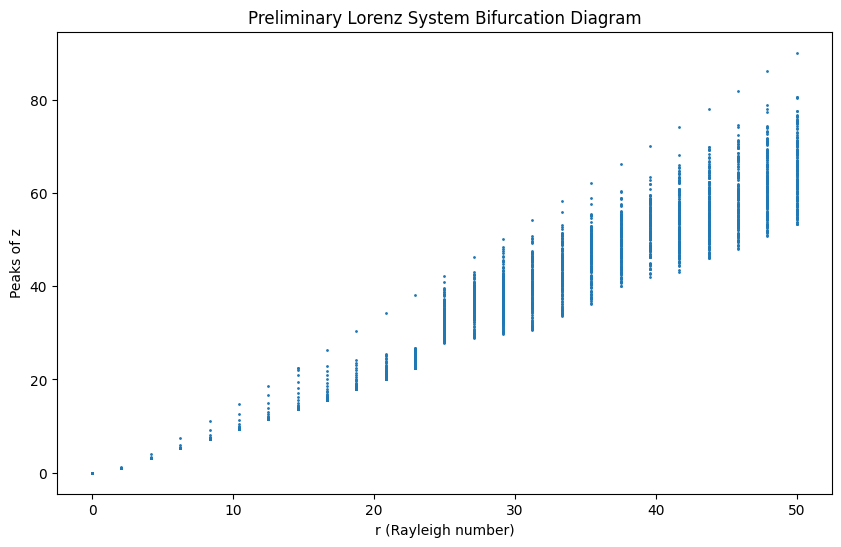

In [7]:

sigma = 10
b = 8/3
r_values = np.linspace(0, 50, 25)  # Example range of r values
initial_state = [1, 1, 1]
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Placeholder for bifurcation data
bifurcation_data = []

for i, r in enumerate(r_values):
    solution = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, b, r), t_eval=t_eval)
    
    # Extract peaks for the z-component
    peaks_indices, _ = find_peaks(solution.y[2])
    peaks = solution.y[2][peaks_indices]
    
    # Prepare data for bifurcation diagram (simple example: use the peaks directly)
    bifurcation_data.extend([(r, peak) for peak in peaks])
    if i % 200 == 0:
        print(f'Finished r={r}')

# Split data for plotting
r_data, peak_data = zip(*bifurcation_data)

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(r_data, peak_data, s=1)
plt.title('Preliminary Lorenz System Bifurcation Diagram')
plt.xlabel('r (Rayleigh number)')
plt.ylabel('Peaks of z')
plt.show()

Finished r=0.0


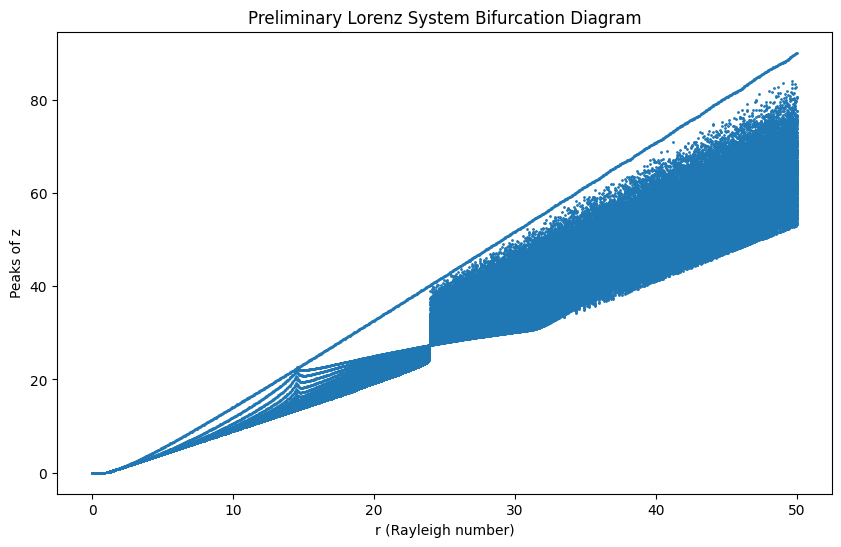

In [5]:

sigma = 10
b = 8/3
r_values = np.linspace(0, 50, 1000)  # Example range of r values
initial_state = [1, 1, 1]
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Placeholder for bifurcation data
bifurcation_data = []

for i, r in enumerate(r_values):
    solution = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, b, r), t_eval=t_eval)
    
    # Extract peaks for the z-component
    peaks_indices, _ = find_peaks(solution.y[2])
    peaks = solution.y[2][peaks_indices]
    
    # Prepare data for bifurcation diagram (simple example: use the peaks directly)
    bifurcation_data.extend([(r, peak) for peak in peaks])
    if i % 200 == 0:
        print(f'Finished r={r}')

# Split data for plotting
r_data, peak_data = zip(*bifurcation_data)

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(r_data, peak_data, s=1)
plt.title('Preliminary Lorenz System Bifurcation Diagram')
plt.xlabel('r (Rayleigh number)')
plt.ylabel('Peaks of z')
plt.show()

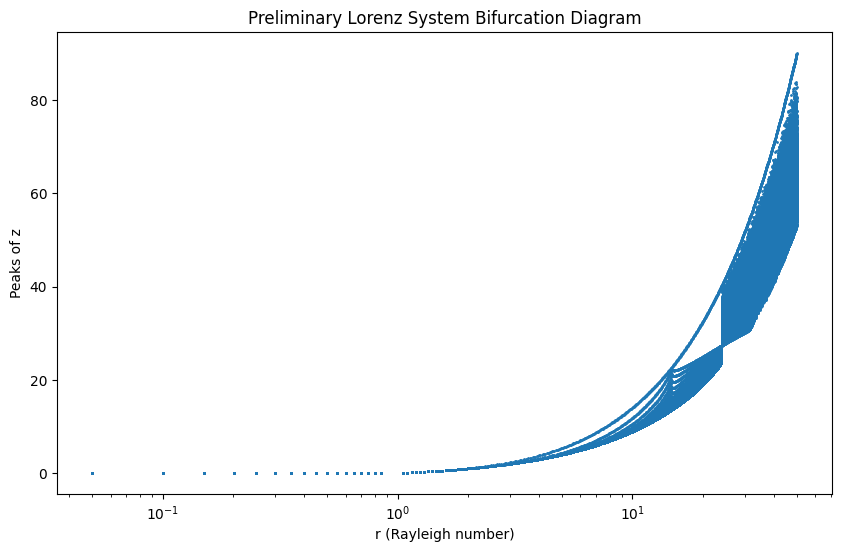

In [6]:
# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(r_data, peak_data, s=1)
# scale x logarithmically
plt.xscale('log')
plt.title('Preliminary Lorenz System Bifurcation Diagram')
plt.xlabel('r (Rayleigh number)')
plt.ylabel('Peaks of z')
plt.show()

/Users/tomonagasutashu/miniconda3/envs/research-DVAE/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


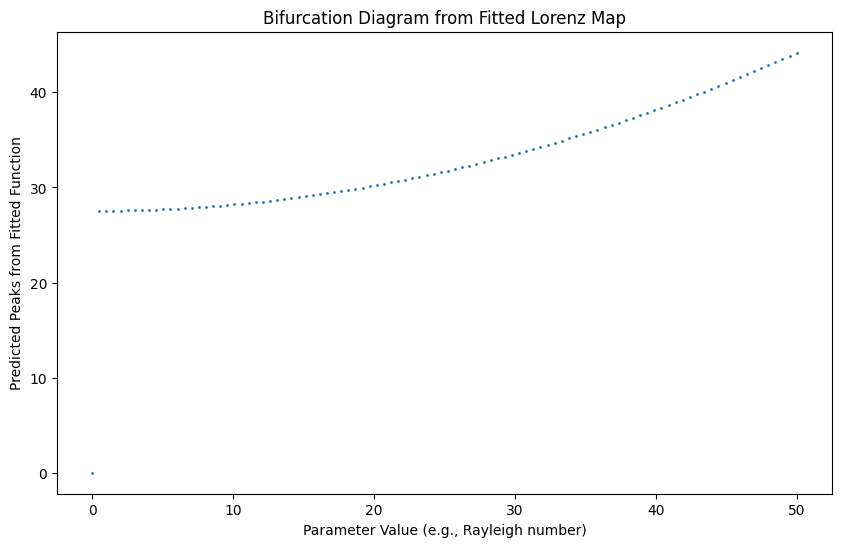

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Hypothetical function to fit the Lorenz map data points
# This could be replaced with a more complex piecewise nonlinear function as needed
def piecewise_nonlinear(x, *params):
    # This is a placeholder; you'll need to define the actual piecewise function based on your data
    return np.piecewise(x, [x < 0.5, x >= 0.5], [lambda x: params[0] * x + params[1], lambda x: params[2] * x**2 + params[3]])

# Example Lorenz map data points
# You should replace these with your actual data points
x_data = z_peaks[:-1]
y_data = z_peaks[1:]

# Fit the piecewise nonlinear function to the Lorenz map data
# The initial guesses and function used will need to be adapted based on your specific model and data
params_initial_guess = [1, 0, 1, 0]
params_opt, params_cov = curve_fit(piecewise_nonlinear, x_data, y_data, p0=params_initial_guess)

# Use the fitted function to generate bifurcation data
# This step is conceptual; you'll need to iterate over parameter values and apply the fitted function to generate the bifurcation diagram
r_values = np.linspace(0, 50, 100)  # Hypothetical range of parameter values
bifurcation_data = piecewise_nonlinear(r_values, *params_opt)

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(r_values, bifurcation_data, s=1)
plt.title('Bifurcation Diagram from Fitted Lorenz Map')
plt.xlabel('Parameter Value (e.g., Rayleigh number)')
plt.ylabel('Predicted Peaks from Fitted Function')
plt.show()


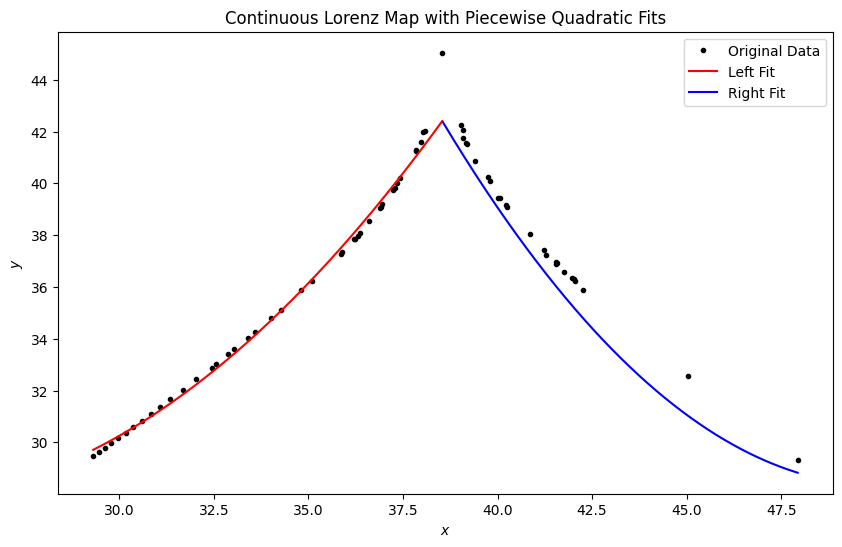

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def quadratic(x, a, b, c):
    """Quadratic function."""
    return a * x**2 + b * x + c

def fit_quadratic(x_data, y_data):
    """Fit quadratic function and return parameters."""
    return curve_fit(quadratic, x_data, y_data, p0=[1, 0, 0])[0]

def find_peak(x_data, y_data):
    """Find peak (maximum y) in the data."""
    peak_index = np.argmax(y_data)
    return x_data[peak_index], y_data[peak_index]

def enforce_continuity(x_peak, params_left, params_right):
    """Adjust parameters for the right quadratic to ensure continuity at the peak."""
    # Calculate right quadratic's c to ensure it passes through (x_peak, y_peak)
    a2, b2 = params_right[:2]
    # Continuity: y_peak = a2*x_peak^2 + b2*x_peak + c2
    c2 = quadratic(x_peak, *params_left) - (a2 * x_peak**2 + b2 * x_peak)
    return [a2, b2, c2]

def spline_fit_and_plot(x_data, y_data):
    x_peak, _ = find_peak(x_data, y_data)
    # Split data
    left_data = (x_data < x_peak)
    right_data = (x_data >= x_peak)
    
    # Fit
    params_left = fit_quadratic(x_data[left_data], y_data[left_data])
    params_right = fit_quadratic(x_data[right_data], y_data[right_data])
    params_right = enforce_continuity(x_peak, params_left, params_right)
    
    # Plot
    x_range = np.linspace(x_data.min(), x_data.max(), 1000)
    y_fit_left = quadratic(x_range[x_range < x_peak], *params_left)
    y_fit_right = quadratic(x_range[x_range >= x_peak], *params_right)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'k.', label='Original Data')
    plt.plot(x_range[x_range < x_peak], y_fit_left, 'r-', label='Left Fit')
    plt.plot(x_range[x_range >= x_peak], y_fit_right, 'b-', label='Right Fit')
    plt.title('Continuous Lorenz Map with Piecewise Quadratic Fits')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()

# Assuming x_data and y_data are already defined as Lorenz system variable's consecutive peaks
x_data = z_peaks[:-1]  # Placeholder, replace with actual data
y_data = z_peaks[1:]   # Placeholder, replace with actual data

spline_fit_and_plot(x_data, y_data)


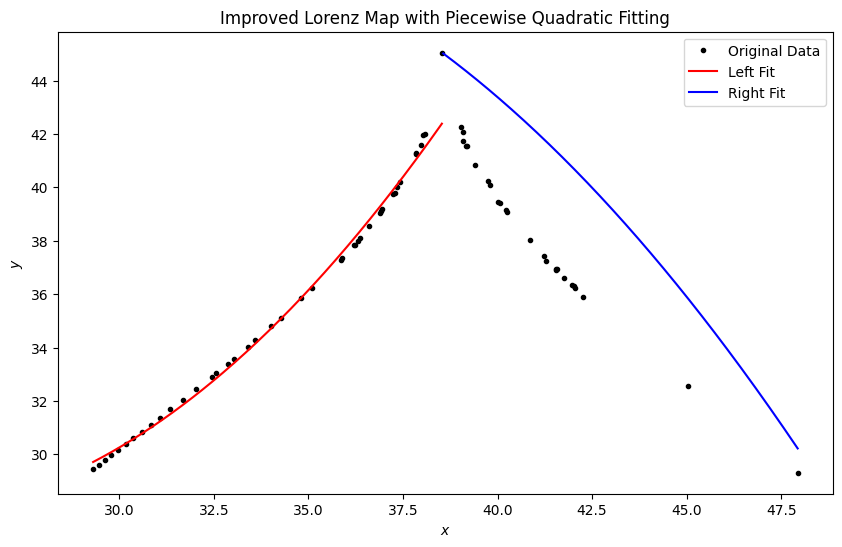

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def find_peak(x_data, y_data):
    """Identify the peak value in y_data and return corresponding x and y values."""
    peak_idx = np.argmax(y_data)
    return x_data[peak_idx], y_data[peak_idx]

def fit_quadratic_with_peak(x_data, y_data, peak_x, peak_y, is_left):
    """Fit quadratic curve with an enforced point (peak) for continuity."""
    if is_left:
        # Fit the left side normally, as it doesn't need adjustment for the peak.
        params, _ = curve_fit(quadratic, x_data, y_data, p0=[1, 0, 0])
    else:
        # Fit the right side except for 'c', which will be adjusted to ensure passing through the peak.
        def temp_quadratic(x, a, b): return a * x**2 + b * x
        params, _ = curve_fit(temp_quadratic, x_data, y_data, p0=[1, 0])
        a, b = params
        # Calculate 'c' to ensure the curve passes through (peak_x, peak_y).
        c = peak_y - (a * peak_x**2 + b * peak_x)
        params = [a, b, c]
    return params

def plot_fitted_curves(x_data, y_data, params_left, params_right, peak_x):
    """Plot original data points and fitted quadratic curves."""
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'k.', label='Original Data')
    
    # Generate a smooth curve for each fit.
    x_vals = np.linspace(x_data.min(), x_data.max(), 500)
    plt.plot(x_vals[x_vals < peak_x], quadratic(x_vals[x_vals < peak_x], *params_left), 'r-', label='Left Fit')
    plt.plot(x_vals[x_vals >= peak_x], quadratic(x_vals[x_vals >= peak_x], *params_right), 'b-', label='Right Fit')
    
    plt.title('Improved Lorenz Map with Piecewise Quadratic Fitting')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()

# Assuming x_data and y_data are your datasets
peak_x, peak_y = find_peak(x_data, y_data)

# Separate data at the peak
left_mask = x_data < peak_x
right_mask = x_data >= peak_x

# Fit quadratic curves to both segments, ensuring the right side passes through the peak
params_left = fit_quadratic_with_peak(x_data[left_mask], y_data[left_mask], peak_x, peak_y, is_left=True)
params_right = fit_quadratic_with_peak(x_data[right_mask], y_data[right_mask], peak_x, peak_y, is_left=False)

plot_fitted_curves(x_data, y_data, params_left, params_right, peak_x)


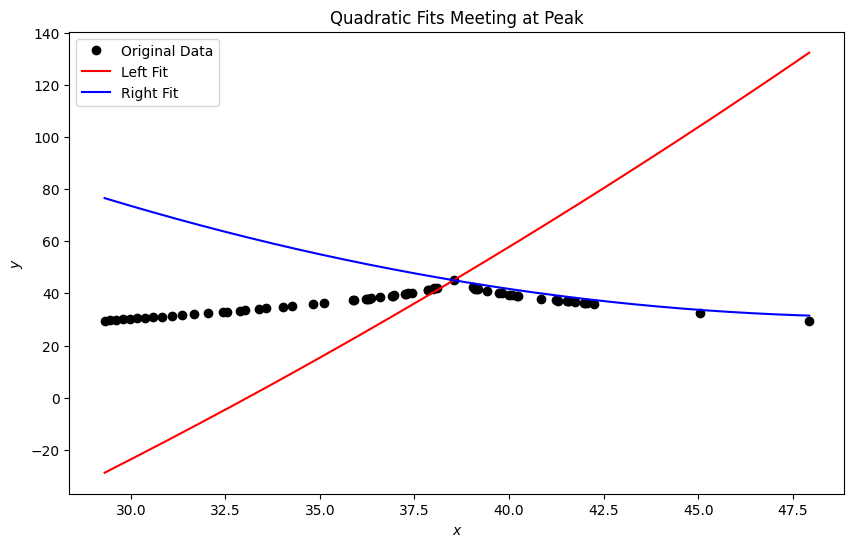

In [ ]:
def mirror_flip_data(x_data, y_data, x_peak):
    """Mirror-flip data around the x_peak for the left side fitting."""
    return 2 * x_peak - x_data, y_data

def enforce_peak_intersect(params, x_peak, y_peak):
    """Adjust 'c' in the quadratic equation to ensure the curve passes through the peak."""
    a, b = params[:2]
    c = y_peak - (a * x_peak**2 + b * x_peak)
    return [a, b, c]

def fit_quadratic_and_enforce_peak(x_data, y_data, x_peak, y_peak, flip_data=False):
    """Fit quadratic curve to data and ensure it intersects the peak."""
    # Fit the quadratic curve with all parameters
    params, _ = curve_fit(quadratic, x_data, y_data, p0=[1, 0, 0])
    
    # Enforce the curve to pass through the peak by adjusting 'c'
    a, b, _ = params
    c = y_peak - (a * x_peak**2 + b * x_peak)
    params_adjusted = [a, b, c]
    
    if flip_data:
        # Mirror-flip adjustment for the left side
        # When data is flipped, 'a' remains the same, but 'b' and 'c' are calculated differently
        x_flipped, y_flipped = mirror_flip_data(x_data, y_data, x_peak)
        c_flipped = y_peak - (a * x_peak**2 - b * x_peak)  # Recalculate 'c' for flipped orientation
        params_adjusted = [a, -b, c_flipped]  # 'b' is negated to account for flipping back
        
    return params_adjusted


def plot_fitted_curves(x_data, y_data, params_left, params_right):
    """Plot the original data points along with the fitted quadratic curves."""
    x_vals = np.linspace(min(x_data), max(x_data), 500)
    y_fit_left = quadratic(x_vals, *params_left)
    y_fit_right = quadratic(x_vals, *params_right)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'ko', label='Original Data')
    plt.plot(x_vals, y_fit_left, 'r-', label='Left Fit')
    plt.plot(x_vals, y_fit_right, 'b-', label='Right Fit')
    plt.title('Quadratic Fits Meeting at Peak')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()

# Assuming x_data and y_data are your datasets
x_peak, y_peak = find_peak(x_data, y_data)
left_side = x_data < x_peak
right_side = x_data >= x_peak

# Fit quadratic curves and enforce peak intersection
params_left = fit_quadratic_and_enforce_peak(x_data[left_side], y_data[left_side], x_peak, y_peak, flip_data=True)
params_right = fit_quadratic_and_enforce_peak(x_data[right_side], y_data[right_side], x_peak, y_peak)

# Plot the results
plot_fitted_curves(x_data, y_data, params_left, params_right)


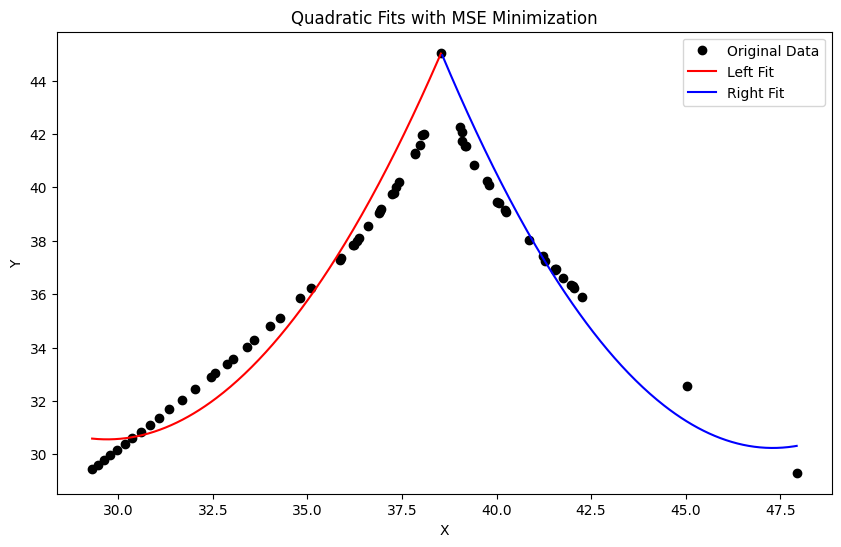

In [ ]:
import numpy as np
from scipy.optimize import minimize

def find_peak(x_data, y_data):
    peak_idx = np.argmax(y_data)
    return x_data[peak_idx], y_data[peak_idx]

def mse_loss(params, x_data, y_data, peak_y):
    a, b = params
    predicted_y = a * x_data**2 + b * x_data + peak_y
    return np.sum((y_data - predicted_y)**2)

def fit_quadratic_side(x_data, y_data, peak_x, peak_y, is_left):
    # Translate data so the peak is at x=0
    x_translated = x_data - peak_x
    
    # Define initial guesses for a and b
    initial_guess = [1, 1]
    
    # Minimize the MSE loss
    result = minimize(mse_loss, initial_guess, args=(x_translated, y_data, peak_y))
    a, b = result.x
    
    # For the left side, mirror the optimization result
    if is_left:
        return a, b
    return a, b

def quadratic(x, a, b, peak_x, peak_y):
    return a * (x - peak_x)**2 + b * (x - peak_x) + peak_y

def plot_fit(x_data, y_data, peak_x, peak_y, params_left, params_right):
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'ko', label='Original Data')
    x_vals = np.linspace(min(x_data), max(x_data), 500)
    
    # Apply parameters for left and right fits
    y_vals_left = quadratic(x_vals[x_vals < peak_x], *params_left, peak_x, peak_y)
    y_vals_right = quadratic(x_vals[x_vals >= peak_x], *params_right, peak_x, peak_y)
    
    plt.plot(x_vals[x_vals < peak_x], y_vals_left, 'r-', label='Left Fit')
    plt.plot(x_vals[x_vals >= peak_x], y_vals_right, 'b-', label='Right Fit')
    plt.title('Quadratic Fits with MSE Minimization')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Assuming x_data and y_data are defined
x_peak, y_peak = find_peak(x_data, y_data)
left_indices = x_data < x_peak
right_indices = x_data >= x_peak

params_left = fit_quadratic_side(x_data[left_indices], y_data[left_indices], x_peak, y_peak, is_left=True)
params_right = fit_quadratic_side(x_data[right_indices], y_data[right_indices], x_peak, y_peak, is_left=False)

plot_fit(x_data, y_data, x_peak, y_peak, params_left, params_right)


In [ ]:
from scipy.optimize import curve_fit

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def divide_into_sections(x_data, y_data, num_sections):
    """
    Divide the data into equidistributed sections based on x_data.
    """
    sections = []
    x_sorted_indices = np.argsort(x_data)
    x_sorted = x_data[x_sorted_indices]
    y_sorted = y_data[x_sorted_indices]
    
    section_size = len(x_sorted) // num_sections
    for i in range(num_sections):
        start_idx = i * section_size
        # Ensure the last section includes any remaining data points
        end_idx = (i + 1) * section_size if i < num_sections - 1 else len(x_sorted)
        sections.append((x_sorted[start_idx:end_idx], y_sorted[start_idx:end_idx]))
    return sections


def fit_section(x_data, y_data, prev_end=None):
    """
    Fit a quadratic section, optionally enforcing continuity from the previous section's end.
    """
    # Initial parameter guesses
    params_initial = [0.1, 0.1, 0.1] if prev_end is None else [0.1, 0.1, prev_end]
    
    # Fit the quadratic function
    params, _ = curve_fit(quadratic, x_data, y_data, p0=params_initial)
    
    if prev_end is not None:
        # Adjust 'c' for continuity with the previous section
        _, _, c_adjusted = enforce_peak_intersect(params, x_data[0], prev_end)
        params[2] = c_adjusted
    
    # Return the fitted parameters and the end value of the fit for this section
    end_value = quadratic(x_data[-1], *params)
    return params, end_value

def fit_and_plot_sections(x_data, y_data, peak_x, peak_y):
    """
    Fit quadratic sections to the data, enforcing continuity between sections.
    """
    # Placeholder for demonstration: divide data into sections around the peak
    # You would implement logic to divide the data into sections based on your criteria
    sections = divide_into_sections(x_data, y_data, peak_x)  # Implement this function based on your needs
    
    prev_end = None
    all_params = []
    
    for x_section, y_section in sections:
        params, prev_end = fit_section(x_section, y_section, prev_end)
        all_params.append(params)
    
def quadratic_piecewise(x, params_list, sections_x):
    """
    Evaluate the piecewise quadratic function at x.
    params_list: List of parameter tuples (a, b, c) for each section.
    sections_x: List of tuples (start_x, end_x) defining the sections.
    """
    for (start_x, end_x), (a, b, c) in zip(sections_x, params_list):
        if start_x <= x <= end_x:
            return a * (x - start_x)**2 + b * (x - start_x) + c
    return None  # x is outside the sections

def plot_fit(x_data, y_data, params_list, sections_x):
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'ko', label='Original Data')
    
    # Generate a smooth curve for the piecewise function
    x_vals = np.linspace(min(x_data), max(x_data), 1000)
    y_vals = [quadratic_piecewise(x, params_list, sections_x) for x in x_vals]
    
    plt.plot(x_vals, y_vals, 'r-', label='Piecewise Fit')
    plt.title('Quadratic Piecewise Fits')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Example usage
num_sections = 3  # Define the number of sections you want
sections = divide_into_sections(x_data, y_data, num_sections)
sections_x = [(min(xs), max(xs)) for xs, _ in sections]  # Start and end x for each section

# Fit quadratic curves to each section and collect parameters
params_list = [fit_quadratic_and_enforce_peak(xs, ys, xs[0], ys[0]) for xs, ys in sections]

plot_fit(x_data, y_data, params_list, sections_x)




TypeError: quadratic() missing 1 required positional argument: 'peak_y'

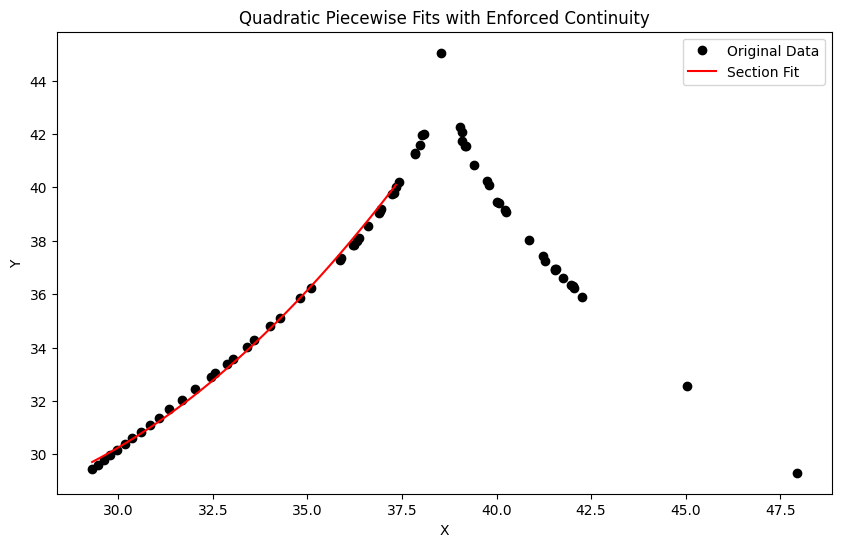

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the quadratic function
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Function to find the peak in the data
def find_peak(x_data, y_data):
    peak_idx = np.argmax(y_data)
    return x_data[peak_idx], y_data[peak_idx]

# Function to enforce continuity at the peak by adjusting 'c'
def enforce_peak_intersect(a, b, x_peak, y_peak):
    c = y_peak - (a * x_peak**2 + b * x_peak)
    return c

# Divide data into equidistributed sections based on x_data
def divide_into_sections(x_data, y_data, num_sections):
    sections = []
    x_sorted_indices = np.argsort(x_data)
    x_sorted = x_data[x_sorted_indices]
    y_sorted = y_data[x_sorted_indices]
    
    section_size = len(x_sorted) // num_sections
    for i in range(num_sections):
        start_idx = i * section_size
        end_idx = (i + 1) * section_size if i < num_sections - 1 else len(x_sorted)
        sections.append((x_sorted[start_idx:end_idx], y_sorted[start_idx:end_idx]))
    return sections

# Fit quadratic curves to each section with enforced continuity
def fit_section(x_data, y_data):
    params, _ = curve_fit(quadratic, x_data, y_data, p0=[1, 0, 1])
    return params

def fit_and_collect_params(sections, peak_x, peak_y):
    all_params = []
    non_empty_sections = [(x_sec, y_sec) for x_sec, y_sec in sections if len(x_sec) > 0]
    
    for i, (x_section, y_section) in enumerate(non_empty_sections):
        a, b, c = fit_section(x_section, y_section)
        # For sections after the first, enforce continuity with the previous section's end
        if i > 0:
            c = enforce_peak_intersect(a, b, x_section[0], quadratic(x_section[0], *all_params[-1]))
        all_params.append((a, b, c))
        
    return all_params



def plot_fit(x_data, y_data, params_list, sections):
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'ko', label='Original Data')
    
    for (a, b, c), section in zip(params_list, sections):
        if len(section[0]) > 0:  # Check if the section has data
            x_vals = np.linspace(section[0][0], section[0][-1], 100)
            y_vals = quadratic(x_vals, a, b, c)
            plt.plot(x_vals, y_vals, 'r-', label='Section Fit')
    
    plt.title('Quadratic Piecewise Fits with Enforced Continuity')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


def estimate_inflection_points(x_data, y_data, peak_x):
    """
    Estimate inflection points on each side of the peak. For simplicity,
    this function looks for the largest change in the slope as a proxy.
    """
    # Calculate slopes between consecutive points
    slopes = np.diff(y_data) / np.diff(x_data)
    # Calculate changes in slope
    slope_changes = np.diff(slopes)
    
    # Find the index of the largest change in slope on each side of the peak
    peak_idx = np.argmax(x_data == peak_x)
    left_inflection_idx = np.argmin(slope_changes[:peak_idx]) + 1  # +1 due to np.diff reducing array size by 1
    right_inflection_idx = np.argmax(slope_changes[peak_idx:]) + peak_idx + 1  # Adjust index for the right side
    
    return x_data[left_inflection_idx], x_data[right_inflection_idx]

def divide_into_four_sections(x_data, y_data, peak_x):
    """
    Divide the data into four sections based on the peak and estimated inflection points.
    """
    left_inflection_x, right_inflection_x = estimate_inflection_points(x_data, y_data, peak_x)
    
    # Define conditions for dividing data
    cond_left_of_peak = x_data < peak_x
    cond_right_of_peak = x_data >= peak_x
    cond_left_of_left_inflection = x_data < left_inflection_x
    cond_right_of_right_inflection = x_data >= right_inflection_x
    
    sections = [
        (x_data[cond_left_of_left_inflection], y_data[cond_left_of_left_inflection]),  # Left of left inflection
        (x_data[~cond_left_of_left_inflection & cond_left_of_peak], y_data[~cond_left_of_left_inflection & cond_left_of_peak]),  # Between left inflection and peak
        (x_data[cond_right_of_peak & ~cond_right_of_right_inflection], y_data[cond_right_of_peak & ~cond_right_of_right_inflection]),  # Between peak and right inflection
        (x_data[cond_right_of_right_inflection], y_data[cond_right_of_right_inflection])  # Right of right inflection
    ]
    
    return sections

# Assuming x_data and y_data are defined
x_peak, y_peak = find_peak(x_data, y_data)
sections = divide_into_four_sections(x_data, y_data, x_peak)  # Example: 3 sections
params_list = fit_and_collect_params(sections, x_peak, y_peak)
plot_fit(x_data, y_data, params_list, sections)
